In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 12, # 相当于小四大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

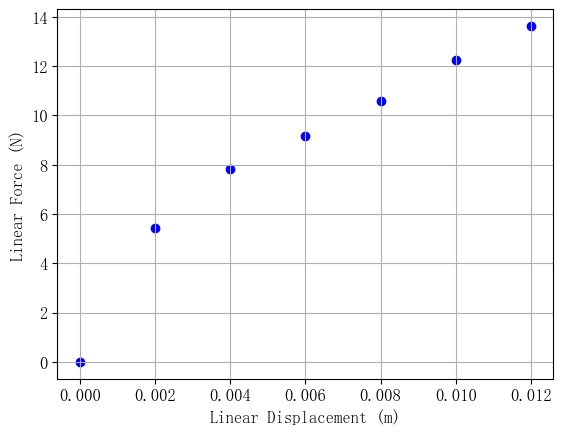

In [57]:
u_x = np.array([0,2,4,6,8,10,12])/1000
phi_x1 = np.array([10,19.6,30.4,40.85,50.13,58.14,65.06])-10
f_x1 = np.array([0,5.17,7.57,8.95,10.46,12.2,13.45])

phi_x2 = np.array([10,19.81,30.72,41.3,50.7,58.83,65.75])-10
f_x2 = np.array([0,5.7,8.05,9.36,10.68,12.25,13.8])

phi_x = (phi_x1 + phi_x2)/180*np.pi/2
f_x = (f_x1 + f_x2)/2

plt.figure()
plt.scatter(u_x,f_x,color='blue')
plt.xlabel('Linear Displacement (m)')
plt.ylabel('Linear Force (N)')
plt.grid()
plt.show()

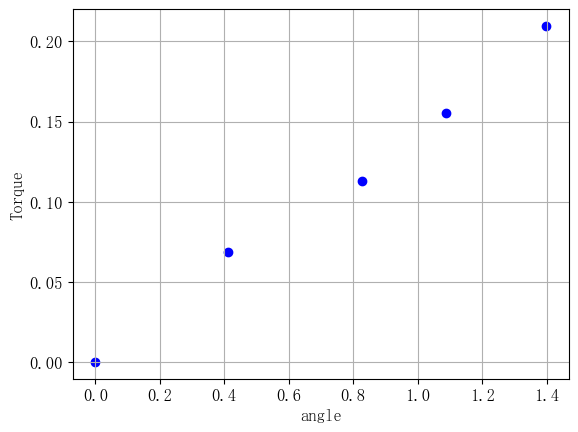

In [58]:

u1 = -1*np.array([41.6, 39.1, 35.4, 33.2, 30.8])+41.6
phi1 = np.array([10.00,32.5, 57.5, 72.7, 90.1])-10.00
T1 = np.array([0, 7.54, 11.49, 16.26, 22.62])*19/2

u2 = -1*np.array([41.6, 40, 38.2, 36.8, 34.7, 32.7, 31.1])+41.6
phi2 = np.array([10.00,  35.8,  61, 73.8, 89.3])-10.00
T2 = np.array([0,  7.56,  12.95, 15.86, 21.57])*19/2

u3 = -1*np.array([41.5, 40.7, 38.9, 35.9, 33.2, 30.9])+41.5
phi3 = np.array([10,  32.2, 53.6,70.5,91.0])-10.00
T3 = np.array([0,  6.48, 11.2, 16.86,22.01])*19/2

#u=(u1+u2+u3)/1000
phi=(phi1+phi2+phi3)/180*np.pi/3
T=(T1+T2+T3)/1000/3

plt.figure()
plt.scatter(phi,T,color='blue')
plt.xlabel('angle')
plt.ylabel('Torque')
plt.grid()
plt.show()


数据2，从实验中获得：

0.41054760144392444


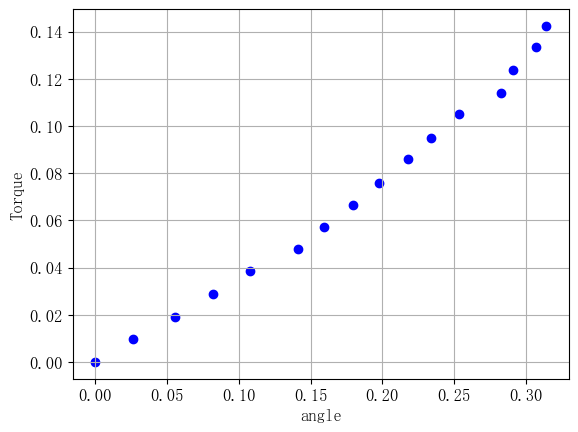

In [59]:
T1 = np.array([0,100.5,200,301.2,405.9,502,602,700.2,799.6,904,999.8,1104.1,1200.5,1301.7,1405,1499])/100*19/2/1000
an = np.array([0, 10-8.5, 10-6.8, 10-5.3,10-3.82,10-1.9,10-0.89,20-9.7,20-8.66,20-7.52,20-6.6,20-5.5,20-3.82,20-3.32,20-2.4,20-2])/180*np.pi
Y, H = T1.T, an.T
theta = 1/(H.T@H)*H.T@Y
print(theta)

plt.figure()
plt.scatter(an,T1,color='blue')
plt.xlabel('angle')
plt.ylabel('Torque')
plt.grid()
plt.show()

######
######
线性弹簧线性拟合-普通最小二乘F = kx

1283.9285714285716


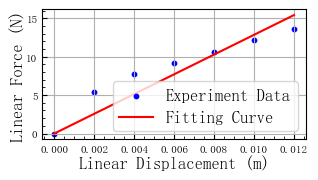

In [60]:
Y, H = f_x.T, u_x.T
theta = 1/(H.T@H)*H.T@Y
print(theta)
plt.figure(figsize=(8.49/2.54,5/2.54))
plt.minorticks_on()
plt.tick_params(axis='x',direction='in',which='both',bottom=True,top=False,labelbottom=True)
plt.tick_params(axis='y',direction='in',which='both',left=True,right=False,labelbottom=True)
plt.tick_params(labelsize=8)

plt.scatter(u_x,f_x,color='blue', s = 10)
plt.plot(u_x,u_x*theta,color='red')
plt.xlabel('Linear Displacement (m)',labelpad=0.5)
plt.ylabel('Linear Force (N)',labelpad=0.5)
plt.grid()
plt.legend(['Experiment Data',"Fitting Curve"])
plt.tight_layout()
plt.savefig("RALfig/K-linearfitting.svg",dpi=300)
plt.show()

0.14613349303075568
0.028331700261223353


<Figure size 640x480 with 0 Axes>

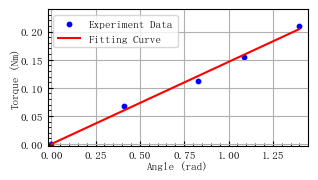

In [61]:
Y, H = T.T, phi.T
theta = 1/(H.T@H)*H.T@Y
print(theta)
plt.figure()
et = 0
for i in range(0, len(phi)):
    et += (T[i] - phi[i]*theta)**2
et /= len(phi)
et = np.sqrt(et)/(max(T) - min(T))
print(et)

plt.figure(figsize=(8.49/2.54,5/2.54))
plt.minorticks_on()
plt.tick_params(axis='x',direction='in',which='both',bottom=True,top=False,labelbottom=True)
plt.tick_params(axis='y',direction='in',which='both',left=True,right=False,labelbottom=True)
plt.tick_params(labelsize=8)

plt.scatter(phi,T,color='blue',s = 10)
plt.plot(phi,phi*theta,color='red') # fitting curve
plt.xlabel('Angle (rad)', fontsize = 8, labelpad=0.5)
plt.ylabel('Torque (Nm)', fontsize = 8, labelpad=0.5)
plt.xlim([-0.02,1.45])
plt.ylim([-0.003,0.24])
plt.grid()
plt.legend(['Experiment Data',"Fitting Curve"],fontsize = 8)
plt.tight_layout();
plt.savefig("RALfig/K-linearfitting.svg",dpi=300)
plt.show()

0.14613349303075568
0.028331700261223353


<Figure size 640x480 with 0 Axes>

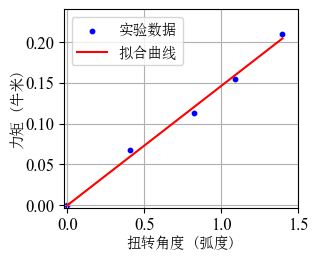

In [62]:
Y, H = T.T, phi.T
theta = 1/(H.T@H)*H.T@Y
print(theta)
plt.figure()
et = 0
for i in range(0, len(phi)):
    et += (T[i] - phi[i]*theta)**2
et /= len(phi)
et = np.sqrt(et)/(max(T) - min(T))
print(et)

plt.figure(figsize=(8.49/2.54,7/2.54))

plt.scatter(phi,T,color='blue',s = 10)
plt.plot(phi,phi*theta,color='red') # fitting curve
plt.xlabel('扭转角度 (弧度)', fontsize = 10.5, labelpad=0.5)
plt.ylabel('力矩 (牛米)', fontsize = 10.5, labelpad=0.5)
plt.xlim([-0.02,1.5])
plt.ylim([-0.003,0.24])
plt.xticks(fontsize = 10.5, fontproperties = "Times New Roman")
plt.yticks(fontsize = 10.5, fontproperties = "Times New Roman")
plt.grid()
plt.legend(['实验数据',"拟合曲线"],fontsize = 10.5)
plt.tight_layout()
plt.savefig("finalfig/K-linearfitting.png",dpi=500)
plt.show()

######
######
非线性弹簧拟合-普通最小二乘F = ax^b

[122.5979      0.5020609]
0.014387760189080945
0.1274901594330158


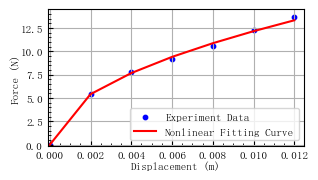

In [63]:

Y,H = [],[]
for i in f_x:
    if i == 0:
        #Y.append(0)
        continue
    else:
        Y.append(np.log(i))
Y = np.array(Y).T

for i in u_x:
    if i == 0:
        #H.append([1,i])
        continue
    else:
        H.append([1,np.log(i)])
H = np.array(H)

theta = np.linalg.inv(H.T@H)@H.T@Y
theta[0] = np.exp(theta[0])
print(theta)

f_fit = []
for i in u_x:
    f_fit.append(theta[0]*np.power(i,theta[1]))

Y, H = f_x.T, u_x.T
theta1 = 1/(H.T@H)*H.T@Y

enonl, el = 0, 0
for j in range(0, len(u_x)):
    enonl += (f_fit[j] - f_x[j]) ** 2
    el += (u_x[j]*theta1 - f_x[j]) ** 2
enonl/=len(u_x)
el/=len(u_x)
print(np.sqrt(enonl)/(max(f_x) - min(f_x)))
print(np.sqrt(el)/(max(f_x) - min(f_x)))

plt.figure(figsize=(8.49/2.54,5/2.54))
plt.minorticks_on()
plt.tick_params(axis='x',direction='in',which='both',bottom=True,top=False,labelbottom=True)
plt.tick_params(axis='y',direction='in',which='both',left=True,right=False,labelbottom=True)
plt.tick_params(labelsize=8)

plt.scatter(u_x,f_x,color='blue',s = 10)
plt.plot(u_x,f_fit,color='red')
#plt.plot(u_x,u_x*theta1,color='black')

plt.xlabel('Displacement (m)', fontsize = 8, labelpad=0.5)
plt.ylabel('Force (N)', fontsize = 8, labelpad=0.5)
plt.legend(['Experiment Data',"Nonlinear Fitting Curve"],fontsize = 8)
plt.grid()
plt.xlim([-0.0001,0.0125])
plt.ylim([-0.1,14.5])
plt.tight_layout()
plt.savefig("RALfig/K-nonlinearfitting.svg",dpi=300)
plt.show()



[122.5979      0.5020609]
0.014387760189080945
0.1274901594330158


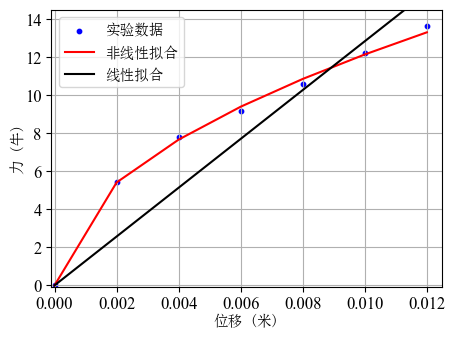

In [64]:

Y,H = [],[]
for i in f_x:
    if i == 0:
        #Y.append(0)
        continue
    else:
        Y.append(np.log(i))
Y = np.array(Y).T

for i in u_x:
    if i == 0:
        #H.append([1,i])
        continue
    else:
        H.append([1,np.log(i)])
H = np.array(H)

theta = np.linalg.inv(H.T@H)@H.T@Y
theta[0] = np.exp(theta[0])
print(theta)

f_fit = []
for i in u_x:
    f_fit.append(theta[0]*np.power(i,theta[1]))

Y, H = f_x.T, u_x.T
theta1 = 1/(H.T@H)*H.T@Y

enonl, el = 0, 0
for j in range(0, len(u_x)):
    enonl += (f_fit[j] - f_x[j]) ** 2
    el += (u_x[j]*theta1 - f_x[j]) ** 2
enonl/=len(u_x)
el/=len(u_x)
print(np.sqrt(enonl)/(max(f_x) - min(f_x)))
print(np.sqrt(el)/(max(f_x) - min(f_x)))

plt.figure(figsize=(12/2.54,9/2.54))
plt.xticks(fontsize = 10.5, fontproperties = "Times New Roman")
plt.yticks(fontsize = 10.5, fontproperties = "Times New Roman")

plt.scatter(u_x,f_x,color='blue',s = 10)
plt.plot(u_x,f_fit,color='red')
plt.plot(u_x,u_x*theta1,color='black')

plt.xlabel('位移 (米)', fontsize = 10.5, labelpad=0.5)
plt.ylabel('力 (牛)', fontsize = 10.5, labelpad=0.5)
plt.legend(['实验数据',"非线性拟合","线性拟合"],fontsize = 10.5)
plt.grid()
plt.xlim([-0.0001,0.0125])
plt.ylim([-0.1,14.5])
plt.tight_layout()
plt.savefig("finalfig/K-nonlinearfitting.png",dpi=500)
plt.show()


######
######
非线性弹簧拟合-普通最小二乘F = ax^3 + bx^2 + cx + d

[ 1.41493056e+07 -3.25029762e+05  2.99774802e+03  1.86666667e-01]


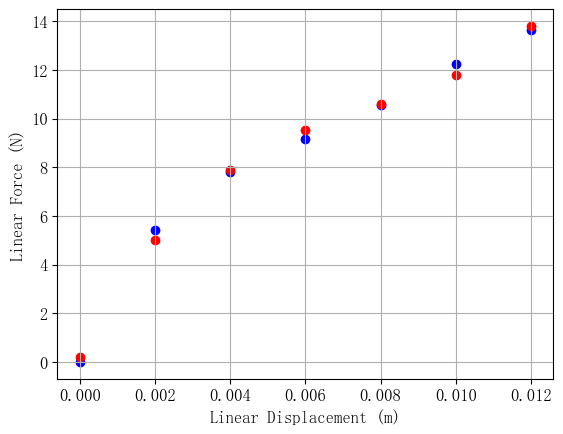

In [65]:
Y,H = [],[]
for i in f_x:
    Y.append(i)
Y = np.array(Y).T

for i in u_x:
    H.append([np.power(i,3),np.power(i,2),i, 1])
H = np.array(H)

theta = np.linalg.inv(H.T@H)@H.T@Y
print(theta)

f_fit = []
for i in u_x:
    f_fit.append(theta[0]*np.power(i,3)+theta[1]*np.power(i,2)+theta[2]*i+theta[3])

plt.figure()
plt.scatter(u_x,f_x,color='blue')
plt.scatter(u_x,f_fit,color='red')
plt.xlabel('Linear Displacement (m)')
plt.ylabel('Linear Force (N)')
plt.grid()
plt.show()

拟合Torque与reP

-199981.83332316348
[-4.47095718e+06  4.19055413e+05 -1.91764462e+05  3.58221924e+02]


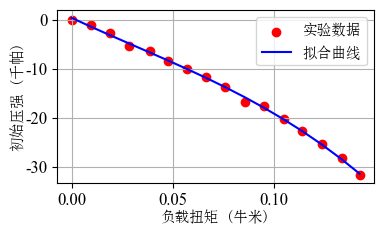

In [66]:
Torque = np.array([0, 100.5, 200,301.2,405.9,502,602,700.2,799.6,904,999.8,1104.1,1200.5,1301.7,1405,1499])/100*19/2/1000
reP = np.array([0, 1.068, 2.82, 5.30, 6.45779, 8.44, 10.0645, 11.63,13.8,16.69,17.548,20.2,22.6,25.29,28.17,31.6553])*-1000


Y1, H1 = reP.T, Torque.T
theta1 = 1/(H1.T@H1)*H1.T@Y1
print(theta1)

Y,H = [],[]
for i in reP:
    Y.append(i)
Y = np.array(Y).T

for i in Torque:
    H.append([np.power(i,3),np.power(i,2),i, 1])
H = np.array(H)

theta = np.linalg.inv(H.T@H)@H.T@Y
print(theta)

f_fit = []
for i in Torque:
    f_fit.append(theta[0]*np.power(i,3)+theta[1]*np.power(i,2)+theta[2]*i+theta[3])

plt.figure(figsize=(4.0,2.5))
plt.xticks(fontsize = 10.5, fontproperties = "Times New Roman")
plt.yticks(fontsize = 10.5, fontproperties = "Times New Roman")
plt.scatter(Torque,reP/1000,color='red')
plt.plot(Torque,np.array(f_fit)/1000,color='blue')
#plt.plot(Torque,f_fit,color='yellow')
plt.xlabel('负载扭矩 (牛米)', fontsize = 10.5,labelpad=0.5)
plt.ylabel('初始压强 (千帕)', fontsize = 10.5,labelpad=0.5)
plt.legend(['实验数据',"拟合曲线"],fontsize = 10.5)
plt.grid()
plt.gcf().subplots_adjust(left=0.14,top=0.99,bottom=0.12, right=0.99)
plt.tight_layout()
plt.savefig("finalfig/Kt-linearfitting.png",dpi=600,bbox_inches = 'tight')
plt.show()

fit Po_gabriel and torque

拟合的多项式:
           2
-5.94e+05 x - 1.399e+05 x - 485.6


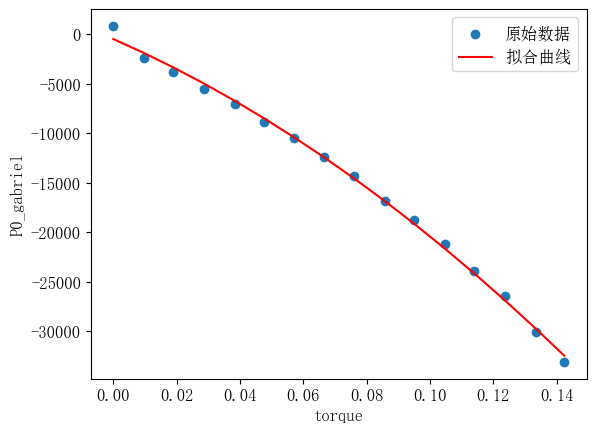

In [6]:
P0_gabriel = np.array([840.25224899,  -2445.93243051,  -3762.61419707,  -5488.78045516,
                     -7051.33161622,  -8891.65837461, -10502.40936156, -12369.21722328,
                    -14345.96022554, -16835.25802654, -18756.14144983,-21152.29551572,
                    -23922.03737022, -26414.34336418, -30064.66150619, -33081.0389181])
Torque = np.array([0, 100.5, 200,301.2,405.9,502,602,700.2,799.6,904,999.8,1104.1,1200.5,1301.7,1405,1499])/100*19/2/1000


degree = 2  # 多项式的阶数
coefficients = np.polyfit(Torque, P0_gabriel, degree)

polynomial = np.poly1d(coefficients)

print("拟合的多项式:")
print(polynomial)

# 生成拟合曲线上的 y 值
y_fit = polynomial(Torque)

plt.scatter(Torque, P0_gabriel, label='原始数据')
plt.plot(Torque, y_fit, label='拟合曲线', color='red')
plt.ylabel('P0_gabriel')
plt.xlabel('torque')
plt.legend()
plt.show()


